# Section 1.2 — Data in practice

This notebook contains all the code from [Section 1.2 Data in practice](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch01_DATA.pdf#page=34) of the **No Bullshit Guide to Statistics**.

In [1]:
2 + 3

5

#### Notebook setup

### Note for Windows users

If you're on macOS or Linux you can ignore this section—skip to the next section **Data management with Pandas**.

File paths on Windows use the backslash character (`\`) as path separator,
while UNIX operating systems like Linux and macOS use forward slash separator `/` as path separator. 

If you you're on Windows you'll need to manually edit the code examples below to make them work by replacing all occurrences of "`/`" with "`\\`". The double backslash is required to get a literal backslash because the character `\` has special meaning as an escape character.

In [2]:
import os

if os.path.sep == "/":
    print("You're on a UNIX system (Linux or macOS).")
    print("Enjoy civilization!")
elif os.path.sep == "\\":
    print("You're on Windows so you should use \\ as path separator.")
    print("Replace any occurence of / (forward slash) in paths with \\\\ (double-backslash).")

You're on a UNIX system (Linux or macOS).
Enjoy civilization!


The current working directory is a path on your computer where this notebook is running.
The code cell below shows you can **get** you **c**urrent **w**orking **d**irectory.

In [3]:
os.getcwd()

'/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/notebooks'

You're in the `notebooks/` directory, which is inside the parent directory `noBSstatsnotebooks/`.

The datasets we'll be using in this notebook are located in the `datasets/` directory, which is sibling of the `notebooks/` directory, inside the parent `noBSstatsnotebooks/`. To access data file `minimal.csv` in the `datasets/` directory from the current directory, we must specify a path that includes the `..` directive (go to parent), then go into the `datasets` directory, then open the file `minimal.csv`.

This combination of "directions" for getting to the file will look different if you're on a Windows system or on a UNIX system. The code below shows the correct path you should access.

In [4]:
if os.path.sep == "/":
    # UNIX path separators
    path = "../datasets/players.csv"
else:
    # Windows path separators
    path = "..\\datasets\\players.csv"

print("The path to the file players.csv in the datasets/ directory is")
path

The path to the file players.csv in the datasets/ directory is


'../datasets/players.csv'

All the code examples provided below assume you're on a UNIX system,
hence the need to manually modify them to use double-backslashes in path strings for the code to work.

## Hands-on data management

### Getting started with JupyterLab Desktop

Follow instructions in the [Python tutorial](./python_tutorial.ipynb) to install JupyterLab Desktop on your computer.


### Download the interactive notebooks for this book

## Data management with Pandas

First let's make sure pandas is installed using the `%pip` Jupyter command.

In [5]:
# %pip install pandas

We then import the `pandas` library as the alias `pd`.

In [6]:
import pandas as pd

### Series

Pandas `pd.Series` objects are similar to Python lists `[3,5,7,9]`.
They are containers for series of values.

In [7]:
s = pd.Series([3, 5, 7, 9])
s

0    3
1    5
2    7
3    9
dtype: int64

Python lists use integers for identifying the elements of the list
(first = index `0`, second = index `1`, last = index `len(self)-1`).

Pandas series support the same functionality.
Here are some example of accessing individual values of the series using the default 0-base indexing.

In [8]:
print("First:  index =", 0, " value =", s[0])
print("Second: index =", 1, " value =", s[1])
print("Last:   index =", len(s)-1, " value =", s[len(s)-1])

First:  index = 0  value = 3
Second: index = 1  value = 5
Last:   index = 3  value = 9


The series `index` attribute tells you all the possible indices for the series.

In [9]:
s.index

RangeIndex(start=0, stop=4, step=1)

The series `s` uses the default index `[0, 1, 2, 3]`, 
which consists of a range of integers, starting at 0,
just like the index of a Python list with four elements.

In [10]:
s.values

array([3, 5, 7, 9])

In [11]:
type(s.values)

numpy.ndarray

In addition to accessing individual elements like this,

In [12]:
s[0]

3

we can also "slice" a series to obtain a new series that contains indices and values of the slice:

In [13]:
s[0:3]

0    3
1    5
2    7
dtype: int64

Performing arithmetic operations on the series.

In [61]:
s.count()

4

In [63]:
# # ALT
# len(s)

In [ ]:
s.sum()

In [15]:
s / s.sum()

0    0.125000
1    0.208333
2    0.291667
3    0.375000
dtype: float64

In [16]:
s.mean()

6.0

In [17]:
s.std()

2.581988897471611

We can also use arbitrary functions from `numpy` on a series,
and Pandas will apply the function to the values in the series.

In [18]:
import numpy as np
np.log(s)

0    1.098612
1    1.609438
2    1.945910
3    2.197225
dtype: float64

### Data frames

Loading the dataset `minimal.csv`

In [19]:
# !cat "../datasets/players.csv"

In [20]:
players = pd.read_csv("../datasets/players.csv")
print(players)

   username country  age  ezlvl    time  points  finished
0      mary      us   38      0  124.94     418         0
1      jane      ca   21      0  331.64    1149         1
2      emil      fr   52      1  324.61    1321         1
3      ivan      ca   50      1   39.51     226         0
4     hasan      tr   26      1  253.19     815         0
5    jordan      us   45      0   28.49     206         0
6    sanjay      ca   27      1  585.88    2344         1
7      lena      uk   23      0  408.76    1745         1
8      shuo      cn   24      1  194.77    1043         0
9     r0byn      us   59      0  255.55    1102         0
10     anna      pl   18      0  303.66    1209         1
11     joro      bg   22      1  381.97    1491         1


In [21]:
players["age"].values

array([38, 21, 52, 50, 26, 45, 27, 23, 24, 59, 18, 22])

In [22]:
players.dtypes

username     object
country      object
age           int64
ezlvl         int64
time        float64
points        int64
finished      int64
dtype: object

### Data frame properties

In [23]:
type(players)

pandas.core.frame.DataFrame

In [24]:
players.index

RangeIndex(start=0, stop=12, step=1)

In [25]:
players.columns

Index(['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished'], dtype='object')

In [26]:
players.shape

(12, 7)

In [27]:
players.dtypes

username     object
country      object
age           int64
ezlvl         int64
time        float64
points        int64
finished      int64
dtype: object

In [65]:
print(players.head(3))

  username country  age  ezlvl    time  points  finished
0     mary      us   38      0  124.94     418         0
1     jane      ca   21      0  331.64    1149         1
2     emil      fr   52      1  324.61    1321         1


In [28]:
players.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  12 non-null     object 
 1   country   12 non-null     object 
 2   age       12 non-null     int64  
 3   ezlvl     12 non-null     int64  
 4   time      12 non-null     float64
 5   points    12 non-null     int64  
 6   finished  12 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0 KB


In [29]:
# players.axes
# players.memory_usage()
# players.values

### Accessing values in a DataFrame

In [66]:
# Sanjay's age
players.loc[6, "age"]

27

#### Entire rows

In [67]:
# Sanjay's data
row6 = players.loc[6,:]
row6

username    sanjay
country         ca
age             27
ezlvl            1
time        585.88
points        2344
finished         1
Name: 6, dtype: object

In [32]:
# Rows of the dataframe are Series objects
type(row6)

pandas.core.series.Series

In [33]:
row6.index

Index(['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished'], dtype='object')

In [34]:
row6.values

array(['sanjay', 'ca', 27, 1, 585.88, 2344, 1], dtype=object)

In [35]:
row6["age"]

27

#### Entire columns

In [36]:
ages = players["age"]
ages

0     38
1     21
2     52
3     50
4     26
5     45
6     27
7     23
8     24
9     59
10    18
11    22
Name: age, dtype: int64

In [37]:
players["age"].equals( players.loc[:,"age"] )

True

In [38]:
players["age"].equals( players.age )

True

In [39]:
type(ages)

pandas.core.series.Series

In [40]:
ages.index

RangeIndex(start=0, stop=12, step=1)

In [41]:
ages.values

array([38, 21, 52, 50, 26, 45, 27, 23, 24, 59, 18, 22])

In [42]:
ages[6]

27

In [43]:
print(players[["age", "time"]])

    age    time
0    38  124.94
1    21  331.64
2    52  324.61
3    50   39.51
4    26  253.19
5    45   28.49
6    27  585.88
7    23  408.76
8    24  194.77
9    59  255.55
10   18  303.66
11   22  381.97


#### Selecting subsets of rows


In [44]:
players.head(4)
# players.tail(2)
# players.sample(3)

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0


To select only rows where `team` is `b`, we first build the boolean selection mask...

In [45]:
mask = players["ezlvl"] == 1
mask

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9     False
10    False
11     True
Name: ezlvl, dtype: bool

... then select the rows using the mask.

In [46]:
players[mask]

,username,country,age,ezlvl,time,points,finished
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
6,sanjay,ca,27,1,585.88,2344,1
8,shuo,cn,24,1,194.77,1043,0
11,joro,bg,22,1,381.97,1491,1


The above two step process can be combined into a more compact expression:

In [47]:
players[players["ezlvl"]==1]

,username,country,age,ezlvl,time,points,finished
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
6,sanjay,ca,27,1,585.88,2344,1
8,shuo,cn,24,1,194.77,1043,0
11,joro,bg,22,1,381.97,1491,1


In [68]:
# BONUS. mask for selecting players with ezlvl=1 and time greater than 200 mins
# players[(players["ezlvl"] == 1) & (players["time"] >= 200)]

In [69]:
# BONUS. mask for selecting USA and Canada players
# players["country"].isin(["us","ca"])

#### Grouping and aggregation

In [50]:
players.groupby("ezlvl")

In [51]:
players.groupby("ezlvl")["time"]

In [52]:
players.groupby("ezlvl")["time"].mean()

ezlvl
0    242.173333
1    296.655000
Name: time, dtype: float64

In [70]:
print(players.groupby("ezlvl")["time"].aggregate(["sum", "mean"]))

           sum        mean
ezlvl                     
0      1453.04  242.173333
1      1779.93  296.655000


In [54]:
players.groupby("ezlvl")["time"] \
  .agg(["sum", "mean"])

,sum,mean
ezlvl,,
0,1453.04,242.173333
1,1779.93,296.655000


In [55]:
(players
  .groupby("ezlvl")["time"]
  .agg(["sum", "mean", "max"])
)

,sum,mean,max
ezlvl,,,
0,1453.04,242.173333,408.76
1,1779.93,296.655000,585.88


## Data visualization with Seaborn

### Studying the effect of `ezlvl` on `time`

We want to study the relation `time ~ ezlvl`,
which will tell us whether the "easy level" version of the game
leads to improvements in user retention.

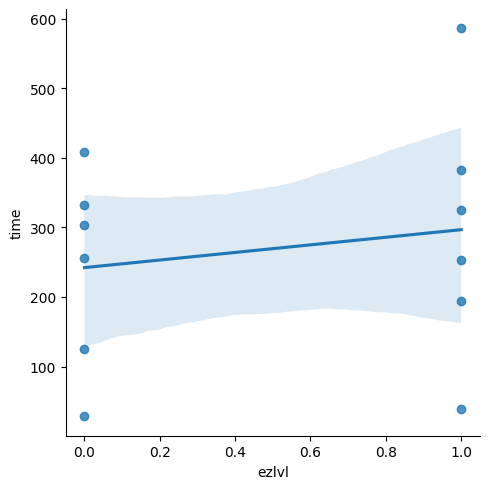

In [56]:
import seaborn as sns
sns.lmplot(x="ezlvl", y="time", data=players)

### Use case 2
In Sec 1.1 use `time ~ age` to look for correlation between age and engagement.

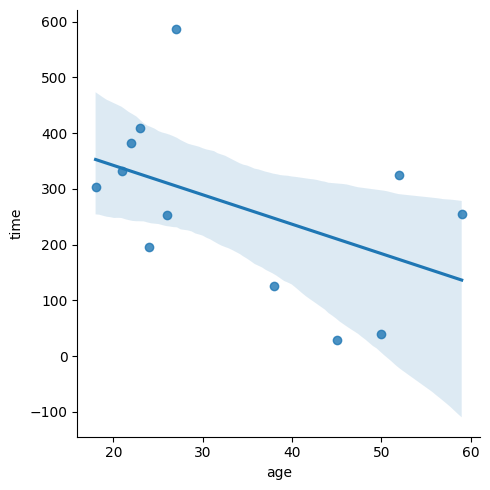

In [57]:
sns.lmplot(x="age", y="time", data=players)

#### Use case 3	

In Sec 1.1	`jobstatus` (non-existent)	explain possible confounding of `time~age` correlation by confounder var. "employed" no time to play game vs. "unemployed" has time to play game, with young ppl being more likely to be unemployed

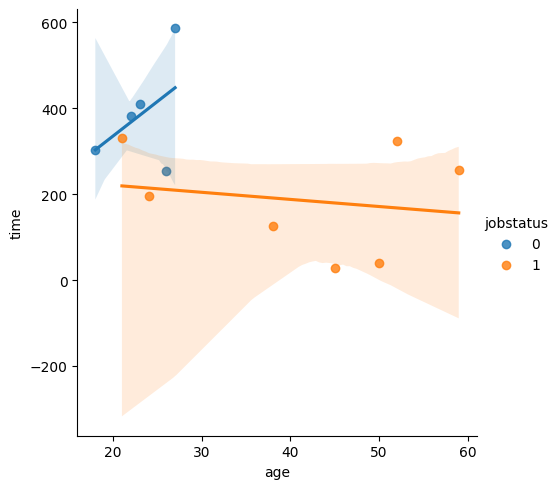

In [58]:
players_full = pd.read_csv("../datasets/players_full.csv")

sns.lmplot(x="age", y="time", hue="jobstatus", data=players_full)

## Datasets for the book

### Website visitors conversion rates

### Electricity prices

### Students effort and scores

In [59]:
students = pd.read_csv("../datasets/students.csv")

In [60]:
students.head()

,student_ID,background,curriculum,effort,score
0,1,arts,debate,10.96,75.0
1,2,science,lecture,8.69,75.0
2,3,arts,debate,8.60,67.0
3,4,arts,lecture,7.92,70.3
4,5,science,debate,9.90,76.1


### Apple weights

### Kombucha volumes

### Doctors' sleep study

## Data pre-processing tasks

- *Extract* the "raw" data from various data source formats
  (spreadsheet, databases, files, web servers).
- *Transform* the data by reshaping and cleaning it.
- *Load* the data into the system used for statistical analysis.